# Introduction

The Jacobian matrix is part of the formulas of the Extended Kalman Filter.

There, the Jacobian appears because a linear approximation of non-linear transition and measurement matrices is needed.

The Jacobian matrix includes all partial derivatives of a vectorial function.

But what do derivatives have to do with linear approximation?

Well, a lot!

Derivatives can be found e.g. in the Taylor series approximation of a function.

# Taylor polynoms and Taylor series approximation of a function

The term $\sum\limits_{i=0}^{n} \frac{f^{(i)}(x_0)}{i!} (x-x_0)^i$ is called a *Taylor polynom*.

A function $f(x)$ can be approximated (in general) better and better using larger and larger *Taylor polynoms*, such that in the limit:

$f(x) = \sum\limits_{i=0}^{\infty} \frac{f^{(i)}(x_0)}{i!} (x-x_0)^i$

In the following we will try to show that the approximation becomes better and better when using larger and larger Taylor polynoms.

But for computing the Taylor polynoms we need to be able to compute the i-th derivative $f^{(i)}(x)$ of a function $f(x)$.

For this, we use the Python module *SymPy*:

https://www.sympy.org/en/index.html

# SymPy for computing derivatives

In [46]:
import sympy

In [47]:
from sympy import diff, sin, cos, exp
from sympy.abc import x,y 

In [48]:
expr = x**2

In [49]:
diff(expr)

2*x

In [50]:
expr = x**5 + x**2 + sin(x)

Let us compute the first derivative of this function:

In [51]:
diff(expr)

5*x**4 + 2*x + cos(x)

Now, let us compute the second derivative of this function:

In [52]:
diff(expr,x,2)

20*x**3 - sin(x) + 2

And what is the 5-th derivative of this function?

In [53]:
diff(expr,x,5)

cos(x) + 120

How can we use/evaluate the resulting function?

In [54]:
d = diff(expr,x,5)

In [55]:
d.evalf(subs={x:0})

121.000000000000

# Taylor polynom class

In [104]:
import math

class taylor_polynom:

    def __init__(self, f, n, x_0):

        self.n = n
        self.x_0 = x_0
        self.derivatives = [diff(f,x,i) for i in range(0,n+1)]
        self.derivatives_evaluated = [d.evalf(subs={x : x_0}) for d in self.derivatives]



    def get_approx(self, x_value):

        s = 0.0
        for i in range(0,self.n+1):
            i_th_term = (self.derivatives_evaluated[i] / math.factorial(i)) * (x_value - self.x_0)**i
            s += i_th_term
        return s
     

In [105]:
f = exp(x)
print( "type=", type(f) )
print( "f(0)=", f.evalf(subs={x:0}) )

type= exp
f(0)= 1.00000000000000


In [106]:
tp = taylor_polynom(f, 5, 0)
print(tp.derivatives)
print(tp.derivatives_evaluated)

[exp(x), exp(x), exp(x), exp(x), exp(x), exp(x)]
[1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000]


In [117]:
f = cos(x)
print( "type=", type(f) )
print( "f(0)=", f.evalf(subs={x:0}) )

type= cos
f(0)= 1.00000000000000


In [143]:
tp = taylor_polynom(f, 10, 0)
print(tp.derivatives)
print(tp.derivatives_evaluated)

[cos(x), -sin(x), -cos(x), sin(x), cos(x), -sin(x), -cos(x), sin(x), cos(x), -sin(x), -cos(x)]
[1.00000000000000, 0, -1.00000000000000, 0, 1.00000000000000, 0, -1.00000000000000, 0, 1.00000000000000, 0, -1.00000000000000]


In [144]:
f.evalf(subs={x:0})

1.00000000000000

In [145]:
tp.get_approx(x_value=0)

1.00000000000000

In [146]:
import numpy as np
xs = np.arange(-5.0,+5.0,0.1)
ys_true = []
ys_approx = []
for x_value in xs:
    ys_true.append( f.evalf(subs={x:x_value}) )
    ys_approx.append( tp.get_approx(x_value) ) 

In [147]:
xs[:5]

array([-5. , -4.9, -4.8, -4.7, -4.6])

In [148]:
ys_true[:5]

[0.283662185463226,
 0.186512369422576,
 0.0874989834394473,
 -0.0123886634628897,
 -0.112152526935053]

In [141]:
ys_approx[:5]

[14.5416666666667,
 13.0150041666667,
 11.5984000000000,
 10.2870041666667,
 9.07606666666668]

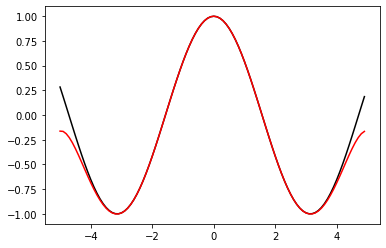

In [149]:
import matplotlib.pyplot as plt
plt.plot(xs,ys_true, color="black")
plt.plot(xs,ys_approx, color="red")
plt.show()